In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/PlantPseAAC/PlantPseAAC978_train_MVMD.mat'
testpath = '../datasets/PlantPseAAC/PlantPseAAC978_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 390/390 [00:00<00:00, 7143.95it/s]

Train data shape:  (588, 1, 300)
Train labels shape:  (588, 12)
Test data shape:  (390, 1, 300)
Test labels shape:  (390, 12)


## SNN

  0%|          | 0/3000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 21
Class 1, class 1 neurons = 4, class 0 neurons = 4
Class 2, class 1 neurons = 3, class 0 neurons = 9
Class 3, class 1 neurons = 6, class 0 neurons = 6
Class 4, class 1 neurons = 3, class 0 neurons = 7
Class 5, class 1 neurons = 1, class 0 neurons = 8
Class 6, class 1 neurons = 1, class 0 neurons = 8
Class 7, class 1 neurons = 8, class 0 neurons = 11
Class 8, class 1 neurons = 3, class 0 neurons = 9
Class 9, class 1 neurons = 1, class 0 neurons = 14
Class 10, class 1 neurons = 3, class 0 neurons = 11
Class 11, class 1 neurons = 4, class 0 neurons = 10


 20%|██        | 600/3000 [6:06:01<24:06:45, 36.17s/it]

Epoch number: 600
Train Precision: 0.9551, Test Precision: 0.7059
Train Recall: 0.1322, Test Recall: 0.0291
Train F1: 0.2322, Test F1: 0.0559
Max. train classwise accuracy for is 0.9796
Min. train classwise accuracy for is 0.7500
Max. test classwise accuracy for is 0.9795
Min. test classwise accuracy for is 0.7179


 40%|████      | 1200/3000 [12:06:31<17:10:36, 34.35s/it]

Epoch number: 1200
Train Precision: 0.8421, Test Precision: 0.4310
Train Recall: 0.2986, Test Recall: 0.1214
Train F1: 0.4409, Test F1: 0.1894
Max. train classwise accuracy for is 0.9830
Min. train classwise accuracy for is 0.7993
Max. test classwise accuracy for is 0.9795
Min. test classwise accuracy for is 0.6564


 60%|██████    | 1800/3000 [17:42:06<11:08:19, 33.42s/it]

Epoch number: 1800
Train Precision: 0.9094, Test Precision: 0.4328
Train Recall: 0.3748, Test Recall: 0.1408
Train F1: 0.5308, Test F1: 0.2125
Max. train classwise accuracy for is 0.9949
Min. train classwise accuracy for is 0.8384
Max. test classwise accuracy for is 0.9795
Min. test classwise accuracy for is 0.6667


 80%|████████  | 2400/3000 [23:13:36<5:29:22, 32.94s/it] 

Epoch number: 2400
Train Precision: 0.8753, Test Precision: 0.3915
Train Recall: 0.5241, Test Recall: 0.2015
Train F1: 0.6556, Test F1: 0.2660
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.8622
Max. test classwise accuracy for is 0.9744
Min. test classwise accuracy for is 0.6718


100%|██████████| 3000/3000 [28:40:26<00:00, 34.41s/it]  

Epoch number: 3000
Train Precision: 0.9150, Test Precision: 0.3478
Train Recall: 0.5692, Test Recall: 0.1942
Train F1: 0.7018, Test F1: 0.2492
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.8605
Max. test classwise accuracy for is 0.9744
Min. test classwise accuracy for is 0.6923
Max. Test Precision: 1.0000 at epoch 1
Test Recall at max. test precision: 0.0024
Test F1 at max. test precision: 0.0048
Train Precision at max. test precision: 1.0000
Train Recall at max. test precision: 0.0373
Train F1 at max. test precision: 0.0720
Max. Test Recall: 0.2500 at epoch 2559
Test Precision at max. test recall: 0.4383
Test F1 at max. test recall: 0.3184
Train Recall at max. test recall: 0.5537
Train Precision at max. test recall: 0.8318
Train F1 at max. test recall: 0.6648
Max. Test F1: 0.3184 at epoch 2559
Test Recall at max. test F1: 0.2500
Test Precision at max. test F1: 0.4383
Train Recall at max. test F1: 0.5537
Train Precision at max. test F1: 0.8318
Trai

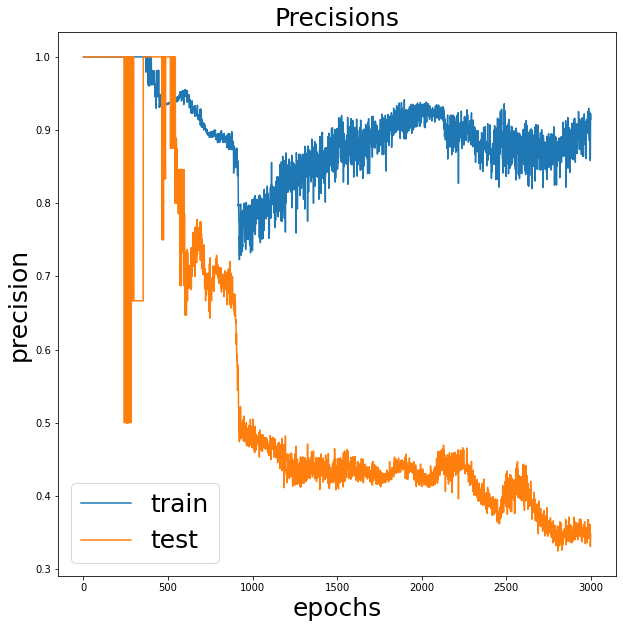

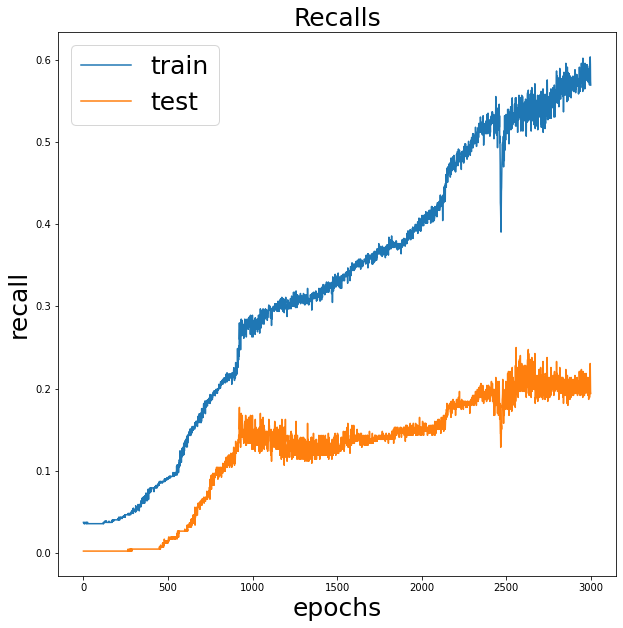

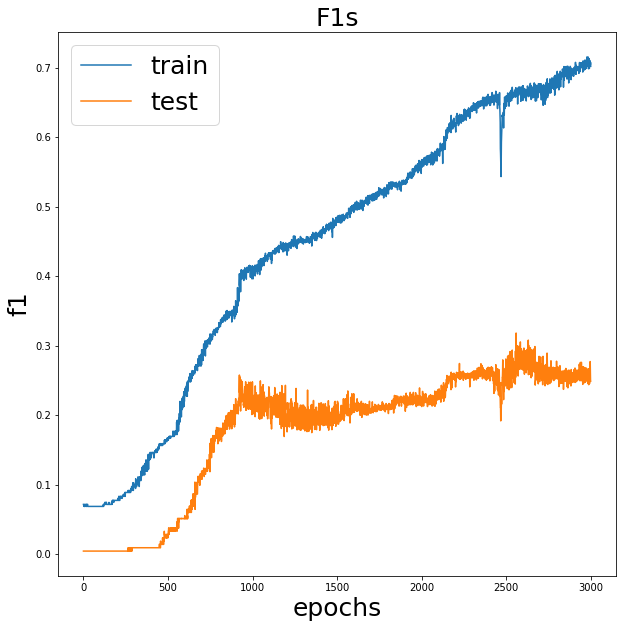

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.40,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 3000,
    'print_every': 600,
    'name': 'Plants',
    'seed': 2,
    'ckpt_dir': './checkpoints/plants',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.40,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 3000,
    'print_every': 600,
    'name': 'Plants',
    'seed': 2,
    'ckpt_dir': './checkpoints/plants',
    'load_from_file': './checkpoints/plants/best_f1_model0.001_3000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()

Model was trained on 12 classes
Evaluating Model on train mode
Classwise Results
|                     |         0 |         1 |        2 |        3 |         4 |   5 |         6 |        7 |         8 |           9 |         10 |         11 |
|:--------------------|----------:|----------:|---------:|---------:|----------:|----:|----------:|---------:|----------:|------------:|-----------:|-----------:|
| class               | 1         | 2         | 3        | 4        | 5         |   6 | 7         | 8        | 9         | 10          | 11         | 12         |
| accuracy            | 0.943878  | 0.982993  | 0.843537 | 0.865646 | 0.972789  |   1 | 0.991497  | 0.884354 | 0.947279  |  0.998299   |  0.991497  |  0.967687  |
| hamming loss        | 0.0561224 | 0.0170068 | 0.156463 | 0.134354 | 0.0272109 |   0 | 0.0085034 | 0.115646 | 0.0527211 |  0.00170068 |  0.0085034 |  0.0323129 |
| zero_one_loss       | 0.0561224 | 0.0170068 | 0.156463 | 0.134354 | 0.0272109 |   0 | 0.0085034 | 0.11